In [ ]:
%pip install imagehash
%pip install matplotlib
%pip install tifffile

In [ ]:
import os
import imagehash
import tifffile
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Directory containing the images
image_dir = 'C:/Users/win 10/Downloads/RSI-CB256/RSI-CB256'

# Load images and calculate their perceptual hashes
image_hashes = {}  # Store image hashes
for filename in os.listdir(image_dir):
        image_path = os.path.join(image_dir, filename )
        image = tifffile.imread(image_path)
        phash = imagehash.average_hash(Image.fromarray(image))
        image_hashes[filename] = phash

# Find duplicate images based on perceptual hashing
duplicate_groups = {}  # Store groups of duplicate images
for filename, phash in image_hashes.items():
    if phash not in duplicate_groups:
        duplicate_groups[phash] = []
    duplicate_groups[phash].append(filename)

# Print and plot duplicate images
for phash, filenames in duplicate_groups.items():
    if len(filenames) > 1:
        print(f"Duplicate images with hash {phash}:")
        for idx, filename in enumerate(filenames):
            print(f"{idx + 1}: {filename}")
            image_path = os.path.join(image_dir, filename)
            image = tifffile.imread(image_path)
            plt.imshow(image)
            plt.title(f"Duplicate {idx + 1}: {filename}")
            plt.show()
        print('\n')

print("Duplicate detection and plotting completed.")

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\win 10\.pyenv\pyenv-win\versions\3.8.4\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "C:\Users\win 10\AppData\Local\Temp\ipykernel_18208\3425538011.py", line 66, in find_duplicates
    self.results_text.window_create(tk.END, window=self.canvas)
  File "c:\Users\win 10\.pyenv\pyenv-win\versions\3.8.4\lib\tkinter\__init__.py", line 3918, in window_create
    self.tk.call(
_tkinter.TclError: bad window path name "<matplotlib.backends.backend_tkagg.FigureCanvasTkAgg object at 0x00000197F4522280>"
C:\Users\win 10\AppData\Local\Temp\ipykernel_18208\3425538011.py:72: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\win 10\.pyenv\pyenv-win\versions\3.8.4\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "C:\Users\win 10\AppData\Local\Temp

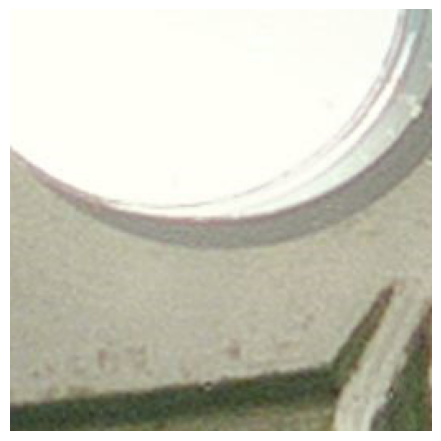

In [4]:
import os
import imagehash
import tifffile
import numpy as np
import tkinter as tk
from tkinter import filedialog
from tkinter import ttk
from PIL import Image, ImageTk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt

class DuplicateImageFinderApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Duplicate Image Finder")

        self.image_dir = tk.StringVar()
        self.image_hashes = {}
        self.duplicate_groups = {}
        
        self.setup_gui()

    def setup_gui(self):
        ttk.Label(self.root, text="Select Image Directory:").pack(pady=10)
        
        self.entry_dir = ttk.Entry(self.root, textvariable=self.image_dir)
        self.entry_dir.pack(padx=10, pady=5, fill=tk.X, expand=True)
        
        ttk.Button(self.root, text="Browse", command=self.browse_directory).pack(padx=10, pady=5)
        ttk.Button(self.root, text="Find Duplicates", command=self.find_duplicates).pack(padx=10, pady=5)
        
        self.results_text = tk.Text(self.root, wrap=tk.WORD, height=10, width=40)
        self.results_text.pack(padx=10, pady=5)
        
    def browse_directory(self):
        directory = filedialog.askdirectory()
        self.image_dir.set(directory)
        
    def find_duplicates(self):
        self.results_text.delete(1.0, tk.END)
        self.image_hashes = {}
        self.duplicate_groups = {}
        
        directory = self.image_dir.get()
        
        for filename in os.listdir(directory):
            if filename.endswith('.tif'):
                image_path = os.path.join(directory, filename)
                image = tifffile.imread(image_path)
                phash = imagehash.average_hash(Image.fromarray(image))
                self.image_hashes[filename] = phash

        for filename, phash in self.image_hashes.items():
            if phash not in self.duplicate_groups:
                self.duplicate_groups[phash] = []
            self.duplicate_groups[phash].append(filename)
        
        for phash, filenames in self.duplicate_groups.items():
            if len(filenames) > 1:
                self.results_text.insert(tk.END, f"Duplicate images with hash {phash}:\n")
                for idx, filename in enumerate(filenames):
                    self.results_text.insert(tk.END, f"{idx + 1}: {filename}\n")
                    image_path = os.path.join(directory, filename)
                    image = tifffile.imread(image_path)
                    self.plot_image(image)
                    self.results_text.window_create(tk.END, window=self.canvas)
                self.results_text.insert(tk.END, '\n')
        
    def plot_image(self, image):
        plt.imshow(image)
        plt.axis('off')
        plt.tight_layout()
        self.canvas = FigureCanvasTkAgg(plt.gcf(), master=self.results_text)
        self.canvas.draw()
        self.canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=True)

if __name__ == "__main__":
    root = tk.Tk()
    app = DuplicateImageFinderApp(root)
    root.mainloop()


In [1]:
import tkinter as tk
from tkinter import filedialog
import tifffile as tiff
import imagehash
import os

class RedundantImageRemoverApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Redundant Image Remover")

        self.folder_path = tk.StringVar()
        self.log_text = tk.StringVar()
        self.log_text.set("Log will appear here.")

        self.create_widgets()

    def create_widgets(self):
        tk.Label(self.root, text="Select Folder:").pack()
        tk.Entry(self.root, textvariable=self.folder_path).pack()
        tk.Button(self.root, text="Browse", command=self.browse_folder).pack()

        tk.Button(self.root, text="Detect Redundant Images", command=self.detect_redundant).pack()

        tk.Label(self.root, text="Log:").pack()
        tk.Label(self.root, textvariable=self.log_text).pack()

        self.removed_images_label = tk.Label(self.root, text="Removed Images:")
        self.removed_images_label.pack()

    def browse_folder(self):
        folder = filedialog.askdirectory()
        self.folder_path.set(folder)

    def detect_redundant(self):
        folder = self.folder_path.get()
        if not folder:
            self.log_text.set("Please select a folder.")
            return

        image_hashes = {}

        removed_images = []

        for filename in os.listdir(folder):
            #if filename.lower().endswith((".tif", ".tiff")):
                image_path = os.path.join(folder, filename)
                try:
                    img = tiff.imread(image_path)
                    img_hash = str(imagehash.phash(img))
                    if img_hash in image_hashes:
                        image_hashes[img_hash].append(image_path)
                    else:
                        image_hashes[img_hash] = [image_path]
                except Exception as e:
                    print(f"Error processing {filename}: {e}")

        # Remove redundant images and keep only one
        for img_list in image_hashes.values():
            if len(img_list) > 1:
                kept_image = img_list[0]
                removed_images.extend(img_list[1:])
                #for img_path in img_list[1:]:
                    #os.remove(img_path)
                self.log_text.set("Removed redundant images.")
                
                # Display removed images and kept image in label
                removed_images_text = "\n".join(removed_images)
                self.removed_images_label.config(text=f"Removed Images:\n{removed_images_text}\nKept Image: {kept_image}")

if __name__ == "__main__":
    root = tk.Tk()
    app = RedundantImageRemoverApp(root)
    root.mainloop()


Error processing sparse_forest(1).tif: 'numpy.ndarray' object has no attribute 'convert'
Error processing sparse_forest(10).tif: 'numpy.ndarray' object has no attribute 'convert'
Error processing sparse_forest(100).tif: 'numpy.ndarray' object has no attribute 'convert'
Error processing sparse_forest(1000).tif: 'numpy.ndarray' object has no attribute 'convert'
Error processing sparse_forest(1001).tif: 'numpy.ndarray' object has no attribute 'convert'
Error processing sparse_forest(1002).tif: 'numpy.ndarray' object has no attribute 'convert'
Error processing sparse_forest(1003).tif: 'numpy.ndarray' object has no attribute 'convert'
Error processing sparse_forest(1004).tif: 'numpy.ndarray' object has no attribute 'convert'
Error processing sparse_forest(1005).tif: 'numpy.ndarray' object has no attribute 'convert'
Error processing sparse_forest(1006).tif: 'numpy.ndarray' object has no attribute 'convert'
Error processing sparse_forest(1007).tif: 'numpy.ndarray' object has no attribute 'con

In [4]:
import tkinter as tk
from tkinter import filedialog
import tifffile as tiff
import imagehash
import os
from PIL import Image

class RedundantImageRemoverApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Redundant Image Remover")

        self.folder_path = tk.StringVar()
        self.log_text = tk.StringVar()
        self.log_text.set("Log will appear here.")

        self.create_widgets()

    def create_widgets(self):
        tk.Label(self.root, text="Select Folder:").pack()
        tk.Entry(self.root, textvariable=self.folder_path).pack()
        tk.Button(self.root, text="Browse", command=self.browse_folder).pack()

        tk.Button(self.root, text="Detect Redundant Images", command=self.detect_redundant).pack()

        tk.Label(self.root, text="Log:").pack()
        tk.Label(self.root, textvariable=self.log_text).pack()

        self.removed_images_label = tk.Label(self.root, text="Removed Images:")
        self.removed_images_label.pack()

    def browse_folder(self):
        folder = filedialog.askdirectory()
        self.folder_path.set(folder)

    def detect_redundant(self):
        folder = self.folder_path.get()
        if not folder:
            self.log_text.set("Please select a folder.")
            return

        image_hashes = {}

        removed_images = []

        for filename in os.listdir(folder):
            if filename.lower().endswith((".tif", ".tiff")):
                image_path = os.path.join(folder, filename)
                try:
                    img_array = tiff.imread(image_path)
                    img = Image.fromarray(img_array)  # Convert to PIL Image
                    img_hash = str(imagehash.phash(img))
                    if img_hash in image_hashes:
                        image_hashes[img_hash].append(image_path)
                    else:
                        image_hashes[img_hash] = [image_path]
                except Exception as e:
                    print(f"Error processing {filename}: {e}")

        # Remove redundant images and keep only one
        for img_list in image_hashes.values():
            if len(img_list) > 1:
                kept_image = img_list[0]
                removed_images.extend(img_list[1:])
                #for img_path in img_list[1:]:
                    #os.remove(img_path)
                self.log_text.set("Removed redundant images.")
                
                # Display removed images and kept image in label
                removed_images_text = "\n".join(removed_images)
                self.removed_images_label.config(text=f"Removed Images:\n{removed_images_text}\nKept Image: {kept_image}")

if __name__ == "__main__":
    root = tk.Tk()
    app = RedundantImageRemoverApp(root)
    root.mainloop()


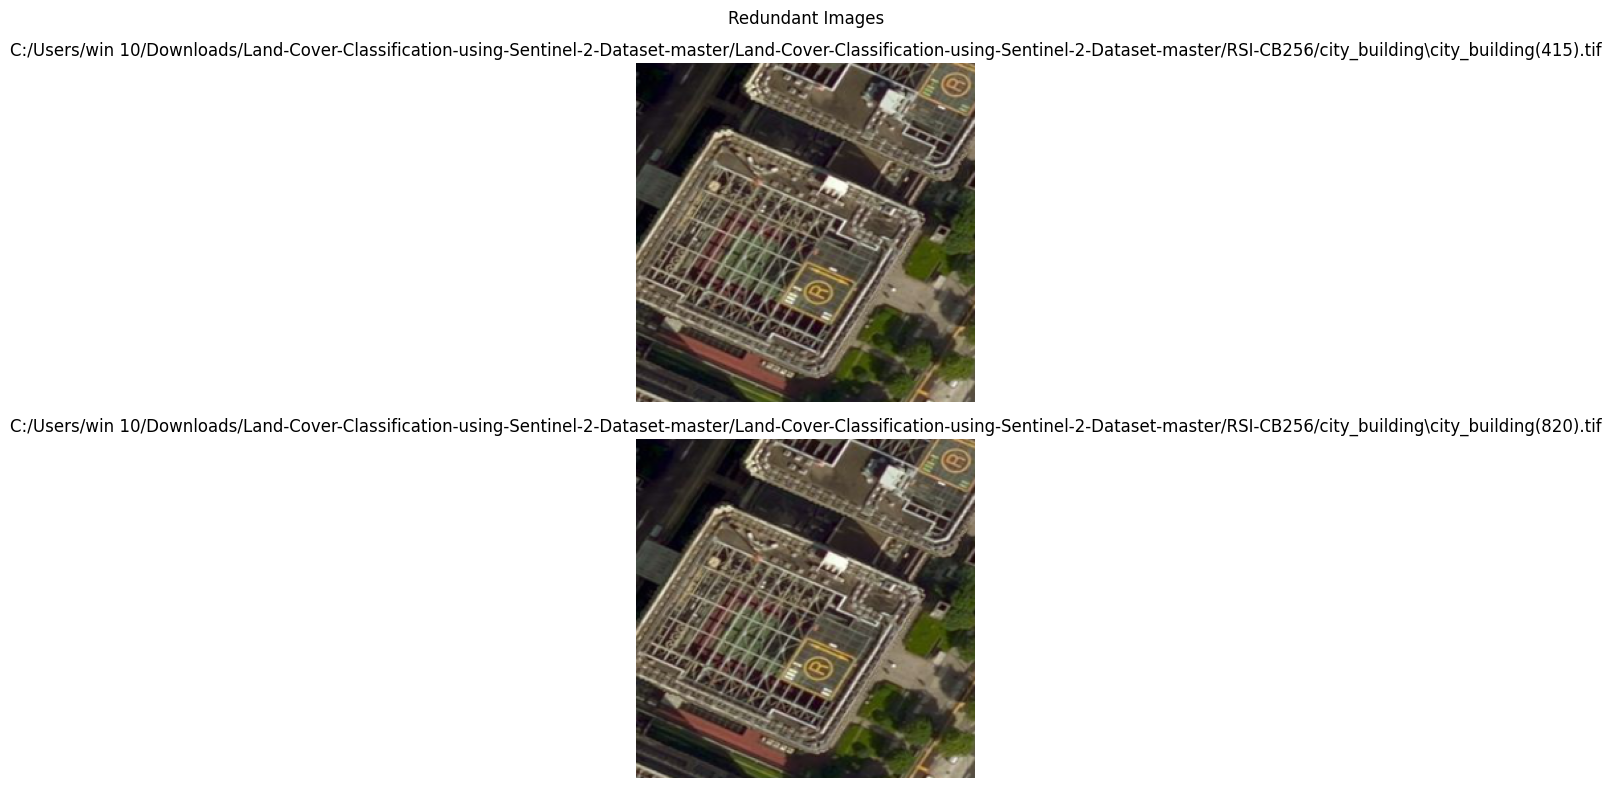

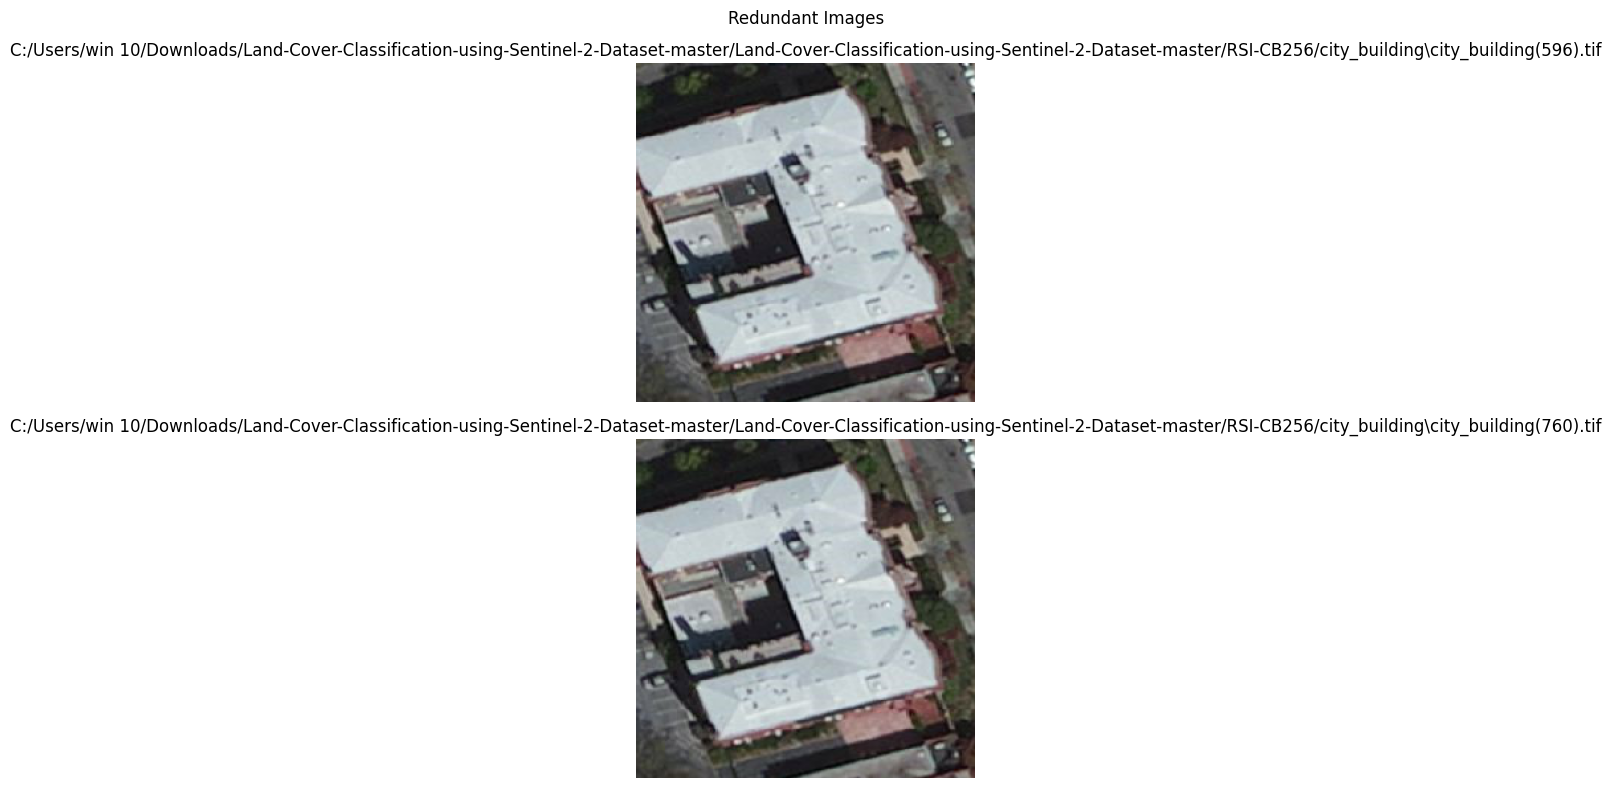

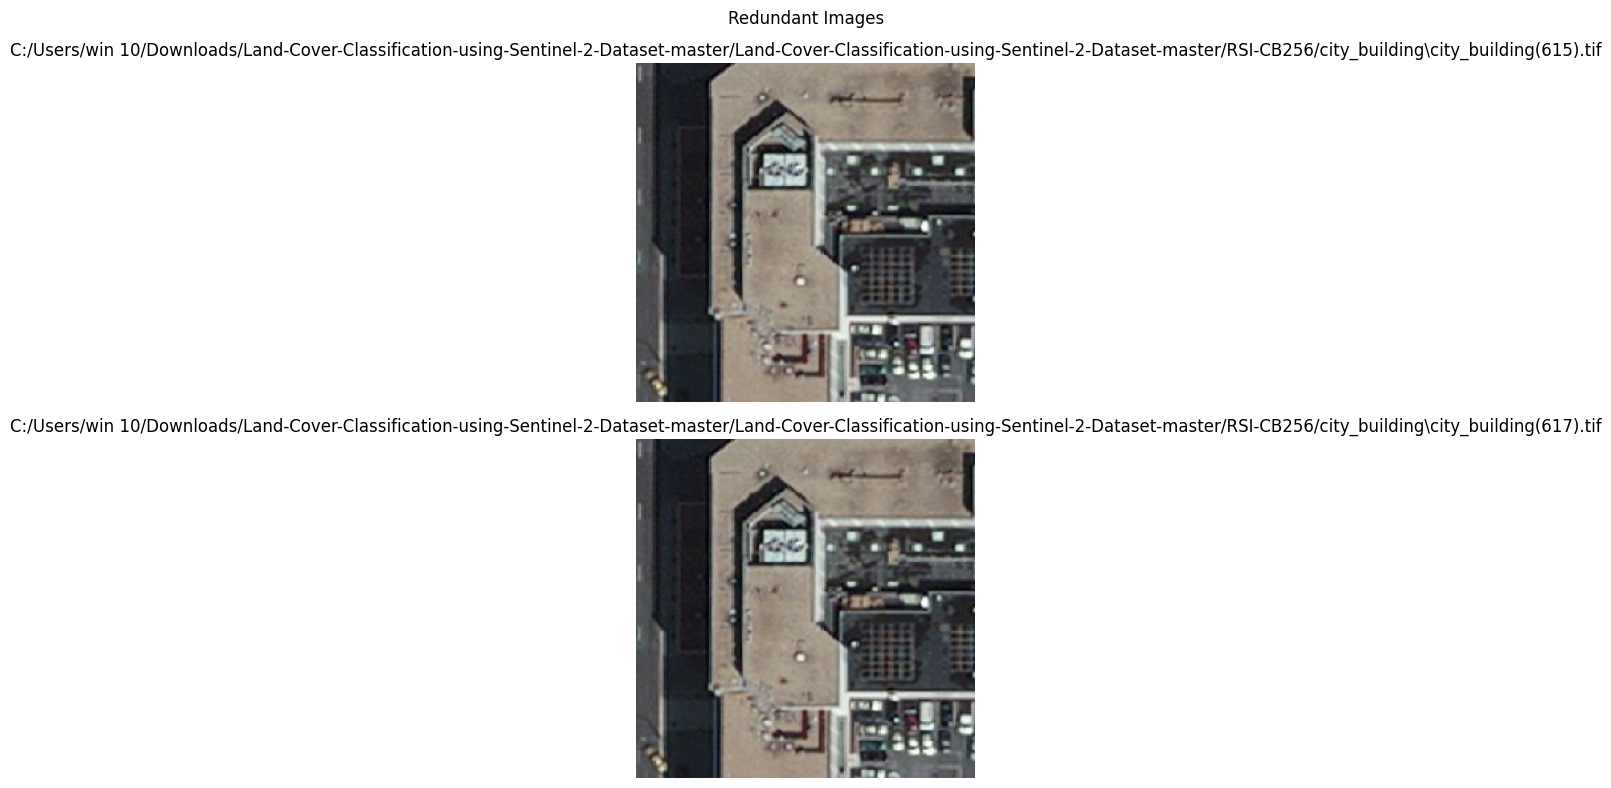

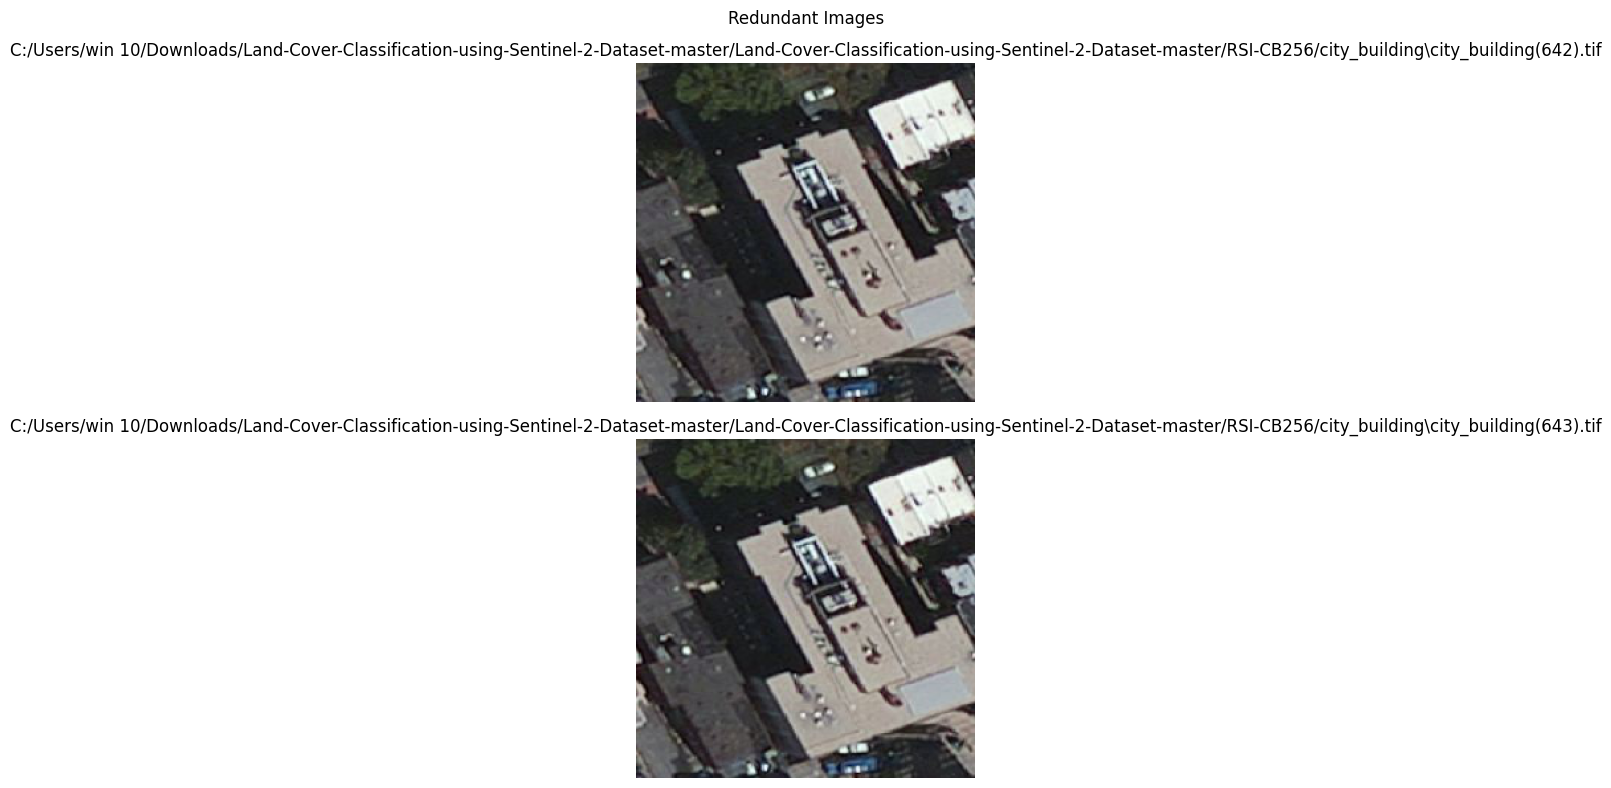

In [6]:
import tkinter as tk
from tkinter import filedialog
import tifffile as tiff
import imagehash
import os
from PIL import Image
import matplotlib.pyplot as plt

class RedundantImageRemoverApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Redundant Image Remover")

        self.folder_path = tk.StringVar()
        self.log_text = tk.StringVar()
        self.log_text.set("Log will appear here.")

        self.create_widgets()

    def create_widgets(self):
        tk.Label(self.root, text="Select Folder:").pack()
        tk.Entry(self.root, textvariable=self.folder_path).pack()
        tk.Button(self.root, text="Browse", command=self.browse_folder).pack()

        tk.Button(self.root, text="Detect Redundant Images", command=self.detect_redundant).pack()

        tk.Label(self.root, text="Log:").pack()
        tk.Label(self.root, textvariable=self.log_text).pack()

        self.removed_images_label = tk.Label(self.root, text="Removed Images:")
        self.removed_images_label.pack()

    def browse_folder(self):
        folder = filedialog.askdirectory()
        self.folder_path.set(folder)
    
    def plot_images(self, img_list):
        plt.figure(figsize=(12, 8))
        plt.suptitle("Redundant Images")
        for i, img_path in enumerate(img_list):
            img = tiff.imread(img_path)
            plt.subplot(len(img_list), 1, i + 1)
            plt.imshow(img, cmap='gray')
            plt.title(img_path)
            plt.axis('off')
        plt.tight_layout()
        plt.show()

    def detect_redundant(self):
        folder = self.folder_path.get()
        if not folder:
            self.log_text.set("Please select a folder.")
            return

        image_hashes = {}

        removed_images = []

        for filename in os.listdir(folder):
            if filename.lower().endswith((".tif", ".tiff")):
                image_path = os.path.join(folder, filename)
                try:
                    img_array = tiff.imread(image_path)
                    img = Image.fromarray(img_array)  # Convert to PIL Image
                    img_hash = str(imagehash.phash(img))
                    if img_hash in image_hashes:
                        image_hashes[img_hash].append(image_path)
                    else:
                        image_hashes[img_hash] = [image_path]
                except Exception as e:
                    print(f"Error processing {filename}: {e}")
        # Plot and show redundant images
        for img_list in image_hashes.values():
            if len(img_list) > 1:
                self.plot_images(img_list)
        
        for img_list in image_hashes.values():
            if len(img_list) > 1:
                kept_image = img_list[0]
                removed_images.extend(img_list[1:])
                #for img_path in img_list[1:]:
                    #os.remove(img_path)
                self.log_text.set("Removed redundant images.")
                
                # Display removed images and kept image in label
                removed_images_text = "\n".join(removed_images)
                self.removed_images_label.config(text=f"Removed Images:\n{removed_images_text}\nKept Image: {kept_image}")


        

    
        # Remove redundant images and keep only one
        

if __name__ == "__main__":
    root = tk.Tk()
    app = RedundantImageRemoverApp(root)
    root.mainloop()
